In [1]:
import pandas as pd

In [133]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep = '\t')

In [3]:
#This is just receipe and ingrients and price

df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [4]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [90]:
len(df.item_name)

4622

In [91]:
for item_index in range(len(df.item_name) -1):
    #print(df.item_name[item_index])
    if 'Chicken' in df.item_name[item_index]:
        #print('non_veg')
        df['VEG'][item_index] = 0
    else:
        #print('veg')
        df['VEG'] = 1

<ipython-input-91-e29abbaf740d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VEG'][item_index] = 0


In [ ]:
df['test'] = df.item_name.str[1].split('').

In [92]:
df.head(5)

,order_id,quantity,item_name,choice_description,item_price,VEG
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,1
1,1,1,Izze,[Clementine],$3.39,1
2,1,1,Nantucket Nectar,[Apple],$3.39,1
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,1
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,1


In [88]:
df['item_name'].groupby(df['VEG']).count()

VEG
0       2
1    4620
Name: item_name, dtype: int64

In [89]:
df

,order_id,quantity,item_name,choice_description,item_price,VEG
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,1
1,1,1,Izze,[Clementine],$3.39,1
2,1,1,Nantucket Nectar,[Apple],$3.39,1
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,1
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,1
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,1
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,1
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,0
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,0


In [57]:
if 'Chicken' in df.item_name[4]:
    print('succ')

succ


In [104]:
test = 9
'Burrito' == df.item_name[test].split(' ')

False

In [5]:
#Lets Extrat list of item having Max price

#df.info()
df['item_name'][df['item_price'] == max(df['item_price'])]

607        Steak Salad Bowl
1418    Barbacoa Salad Bowl
1421    Barbacoa Salad Bowl
1825    Barbacoa Salad Bowl
1865    Carnitas Salad Bowl
2600       Steak Salad Bowl
2624       Steak Salad Bowl
3098       Steak Salad Bowl
3115    Carnitas Salad Bowl
3356    Barbacoa Salad Bowl
4036       Steak Salad Bowl
4241       Steak Salad Bowl
4390    Barbacoa Salad Bowl
4391       Steak Salad Bowl
4419       Steak Salad Bowl
4547       Steak Salad Bowl
4572       Steak Salad Bowl
Name: item_name, dtype: object

In [6]:
#Lets Extract whetre quantity is more 
df.iloc[df['item_name'][df['quantity'] == max(df['quantity'])].index]

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25


In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [8]:
df.item_price.unique()

array(['$2.39 ', '$3.39 ', '$16.98 ', '$10.98 ', '$1.69 ', '$11.75 ',
       '$9.25 ', '$4.45 ', '$8.75 ', '$11.25 ', '$8.49 ', '$2.18 ',
       '$8.99 ', '$1.09 ', '$2.95 ', '$2.15 ', '$3.99 ', '$22.50 ',
       '$11.48 ', '$17.98 ', '$17.50 ', '$4.30 ', '$5.90 ', '$1.25 ',
       '$23.78 ', '$6.49 ', '$11.08 ', '$1.50 ', '$22.16 ', '$32.94 ',
       '$22.20 ', '$10.58 ', '$2.50 ', '$23.50 ', '$7.40 ', '$18.50 ',
       '$3.00 ', '$6.78 ', '$11.89 ', '$9.39 ', '$4.00 ', '$3.75 ',
       '$8.69 ', '$2.29 ', '$8.90 ', '$3.27 ', '$3.89 ', '$8.19 ',
       '$35.00 ', '$27.75 ', '$11.80 ', '$6.00 ', '$26.25 ', '$21.96 ',
       '$4.36 ', '$7.50 ', '$4.78 ', '$13.35 ', '$6.45 ', '$5.07 ',
       '$22.96 ', '$7.17 ', '$7.98 ', '$4.50 ', '$26.07 ', '$12.98 ',
       '$35.25 ', '$44.25 ', '$10.50 ', '$33.75 ', '$16.38 ', '$13.52 ',
       '$5.00 ', '$15.00 ', '$8.50 ', '$17.80 ', '$1.99 ', '$11.49 '],
      dtype=object)

In [ ]:
#lets extract items which are less price( < 4 dollar)

df['item_price_flaot'] = df['item_price'].str.split('$').str[1]

In [ ]:
df.item_price_flaot.astype('float')

In [ ]:
df['item_price_flaot'] =df['item_price_flaot'].astype('float')

In [ ]:
df['item_price_flaot'].dtype

In [ ]:
df['Expensive'] = df['item_price_flaot'] >4.0

In [ ]:
# column Expensive can give whch item is greter that 4 dollar 
df

# Second Task

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt',sep=' ')

In [ ]:
df2.head()

In [ ]:
#lets find out where alcohol is max

k  = df2['name'][df2['alcohol'] == max(df2['alcohol'])]

In [ ]:
pd.DataFrame(k)

In [ ]:
#Cal is greter that 150
df2[df2['calories'] >150]

# Task 3

In [ ]:
df3 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv')

In [ ]:
df3.head(3)

In [ ]:
df3.info()

In [ ]:
b = df3['Year'][max(df3.Murder) == df3['Murder']]
b

In [ ]:
#Max Murder Year
pd.DataFrame(b)

In [ ]:
d = df3['Year'][max(df3.Forcible_Rape) == df3['Forcible_Rape']]
d

# Task4

In [ ]:
df4 = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/datasets.csv')

In [ ]:
df4.info()

In [ ]:
df4.head()

In [ ]:
df4['CSV'][0]

In [ ]:
#Just checking what those URL holding
df5 = pd.read_csv(df4['CSV'][0])

In [ ]:
df5.head()

In [ ]:
#getting insight who done max affiars
df5.groupby('gender').affairs.max()

In [ ]:
j = df5['gender'][df5.children == 'yes']

In [ ]:
j.describe()

In [185]:
df.item_name[1]

'Izze'

In [117]:
df['Non_Veg'] = df.item_name.str.split(' ').str[0] == ('Chicken' or 'Steak')

In [131]:
df= str(df.Non_Veg).replace('True','1')

In [132]:
df

'0       False\n1       False\n2       False\n3       False\n4        1\n        ...  \n4617    False\n4618    False\n4619     1\n4620     1\n4621     1\nName: Non_Veg, Length: 4622, dtype: bool'

In [134]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [139]:
df['Non_veg'] = df.item_name.str.split(' ').str[0] == ('Chicken' or 'Steak')

In [142]:
df.Non_veg = df.Non_veg.astype('int')

In [143]:
df

,order_id,quantity,item_name,choice_description,item_price,Non_veg
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,0
1,1,1,Izze,[Clementine],$3.39,0
2,1,1,Nantucket Nectar,[Apple],$3.39,0
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,0
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,1
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,0
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,0
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,1
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,1


In [162]:
df.groupby('Non_veg').count()

,order_id,quantity,item_name,choice_description,item_price
Non_veg,,,,,
0,3062,3062,3062,1816,3062
1,1560,1560,1560,1560,1560


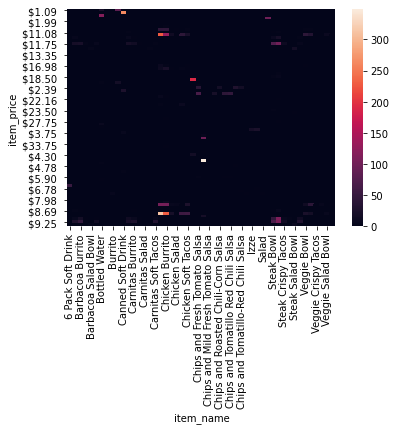

In [150]:
import seaborn as sns

sns.heatmap(pd.crosstab(df['item_price'],df['item_name']))

In [151]:
pd.crosstab(df['item_name'],df['item_price'])

item_price,$1.09,$1.25,$1.50,$1.69,$1.99,$10.50,$10.58,$10.98,$11.08,$11.25,...,$7.98,$8.19,$8.49,$8.50,$8.69,$8.75,$8.90,$8.99,$9.25,$9.39
item_name,,,,,,,,,,,,,,,,,,,,,
6 Pack Soft Drink,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Barbacoa Bowl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,8,28,0
Barbacoa Burrito,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,2,0,0,19,46,0
Barbacoa Crispy Tacos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,0
Barbacoa Salad Bowl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
Barbacoa Soft Tacos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,15,0
Bottled Water,22,0,117,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bowl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Burrito,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
df.item_price = df.item_price.str.strip('$')

In [158]:
df.item_price = df.item_price.astype('float')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
 5   Non_veg             4622 non-null   int32  
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 198.7+ KB


In [202]:
df.choice_description[5].replace('[','').replace(']','').split(',')

['Fresh Tomato Salsa (Mild)',
 ' Rice',
 ' Cheese',
 ' Sour Cream',
 ' Guacamole',
 ' Lettuce']

In [220]:
df.choice_description = df.choice_description.fillna('None')

In [226]:

df.choice_description = df.choice_description.apply(lambda x: x.replace('[','').replace(']','').split(','))

#df.choice_description.apply(lambda x: print(type(x)))

In [229]:
df.choice_description[4621]

['Fresh Tomato Salsa', ' Fajita Vegetables', ' Pinto Beans', ' Lettuce']

In [230]:
df

,order_id,quantity,item_name,choice_description,item_price,Non_veg
0,1,1,Chips and Fresh Tomato Salsa,[None],2.39,0
1,1,1,Izze,[Clementine],3.39,0
2,1,1,Nantucket Nectar,[Apple],3.39,0
3,1,1,Chips and Tomatillo-Green Chili Salsa,[None],2.39,0
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), Black Beans...",16.98,1
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, Rice, Black Beans, Sou...",11.75,0
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, Rice, Sour Cream, Chee...",11.75,0
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, Fajita Vegetables, Pint...",11.25,1
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, Fajita Vegetables, Lett...",8.75,1


In [231]:
df.order_id.unique()

array([   1,    2,    3, ..., 1832, 1833, 1834], dtype=int64)

In [236]:
df.order_id.drop_duplicates()

0          1
4          2
5          3
7          4
9          5
        ... 
4610    1830
4612    1831
4615    1832
4617    1833
4619    1834
Name: order_id, Length: 1834, dtype: int64